In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import shutil

import massipipe.processors as mpp
import massipipe
import massipipe.utils as mpu
from massipipe.pipeline import PipelineProcessor


In [2]:
# Get Massipipe root directory
mp_root = Path(massipipe.__file__).parent.parent
print(mp_root)

C:\Users\mha114\Dropbox\Python\massipipe


In [3]:
# Create new temporary directory with example dataset
# temp_dataset_dir = mp_root / 'tmp'
#     with zipfile.ZipFile(EXAMPLE_DATA_PATH, mode="r") as zip_file:
#         zip_file.extractall(path=tmp_dir)

In [2]:
# Create pipeline processor (for easy access to paths)
pp = PipelineProcessor(
    Path("example_data/massimal_larvik_olbergholmen_202308301001-test_hsi")
)

16:50:50 INFO: File logging initialized.


In [3]:
pp.create_quicklook_images()

16:50:54 INFO: ---- QUICKLOOK IMAGE GENERATION ----
16:50:54 INFO: Creating quicklook version of OlbergholmenS1_Pika_L_5.bil.hdr
c:\Users\mha114\Miniconda3\envs\massipipe\lib\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(
16:50:54 INFO: Creating quicklook version of OlbergholmenS1_Pika_L_8.bil.hdr


In [4]:
pp.rad_gc_rgb_im_paths


[WindowsPath('example_data/massimal_larvik_olbergholmen_202308301001-test_hsi/1b_radiance_gc/rgb/massimal_larvik_olbergholmen_202308301001-test_hsi_000_radiance_gc_rgb.tiff'),
 WindowsPath('example_data/massimal_larvik_olbergholmen_202308301001-test_hsi/1b_radiance_gc/rgb/massimal_larvik_olbergholmen_202308301001-test_hsi_001_radiance_gc_rgb.tiff')]

In [3]:
# Create radiance calibration dataset
rad_cal_dataset = mpp.RadianceCalibrationDataset(pp.radiance_calibration_file)
print(rad_cal_dataset.calibration_file)

In [19]:
# Get example dark frame + radiaance conversion frame
rad_cal_dataset = mpp.RadianceCalibrationDataset(rad_cal_dataset.calibration_file)
dark_frame, _, _, dark_gain, dark_shutter = rad_cal_dataset.get_closest_dark_frame(
    gain=15, shutter=9.274
)
rad_conv_frame, _, _ = rad_cal_dataset.get_rad_conv_frame()

22:24:57 INFO: Non-empty calibration directory example_data\massimal_larvik_olbergholmen_202308301001-test_hsi\calibration\radiance_calibration_frames
22:24:57 INFO: Assuming calibration file already unzipped.


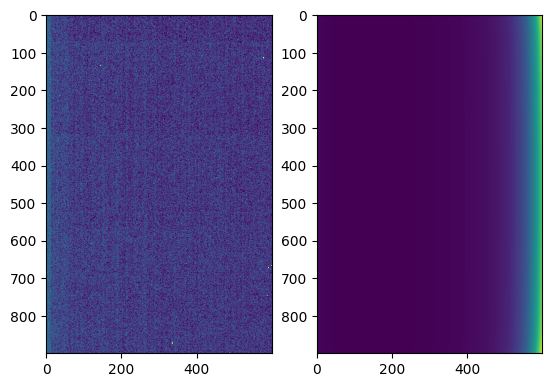

In [56]:
# Plot dark frame and radiance conversion frame
fig, ax = plt.subplots(ncols=2)
ax[0].imshow(dark_frame.squeeze().astype(np.float32), vmax=3)  # type: ignore
ax[1].imshow(rad_conv_frame.squeeze())  # type: ignore
plt.show()

In [53]:
# Print example values
print(dark_frame[0, 400, 300])
print(rad_conv_frame[0, 400, 300])

1.0
10.337038


In [57]:
# Load example image and convert to radiance
raw_image, raw_wl, raw_meta = mpu.read_envi(pp.raw_image_paths[0])
radiance_converter = mpp.RadianceConverter(pp.radiance_calibration_file)
rad_image = radiance_converter.convert_raw_image_to_radiance(raw_image, raw_meta)

23:08:02 INFO: Non-empty calibration directory example_data\massimal_larvik_olbergholmen_202308301001-test_hsi\calibration\radiance_calibration_frames
23:08:02 INFO: Assuming calibration file already unzipped.


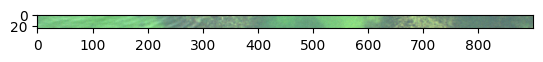

In [63]:
# Show RGB version of example image (normalize to max=1)
rad_rgb, rgb_wl = mpu.rgb_subset_from_hsi(rad_image, raw_wl)
rad_rgb = rad_rgb / np.max(rad_rgb)
plt.imshow(rad_rgb)
plt.show()

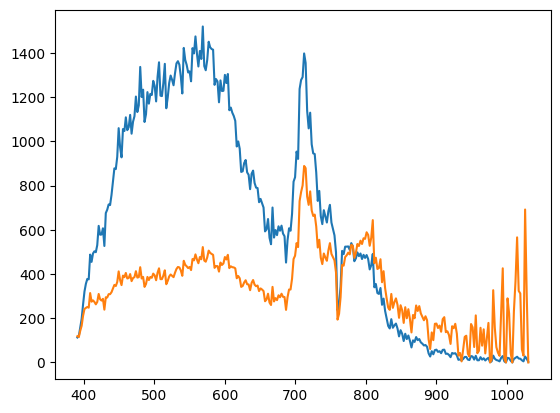

441


In [68]:
# Show example raw and radiance spectrum
plt.plot(raw_wl, raw_image[10, 300, :])
plt.plot(raw_wl, rad_image[10, 300, :])
plt.show()
print(rad_image[10, 300, 100])

In [16]:
irrad_converter = mpp.IrradianceConverter(pp.irradiance_calibration_file)
raw_spec, raw_spec_wl, raw_spec_meta = mpu.read_envi(pp.raw_spec_paths[0])
irrad_spec = irrad_converter.convert_raw_spectrum_to_irradiance(raw_spec, raw_spec_meta)
raw_spec, irrad_spec = raw_spec.squeeze(), irrad_spec.squeeze()

09:21:53 INFO: Non-empty downwelling calibration directory example_data\massimal_larvik_olbergholmen_202308301001-test_hsi\calibration\downwelling_calibration_spectra
09:21:53 INFO: Skipping unzipping of downwelling calibration file, assuming unzipping already done.


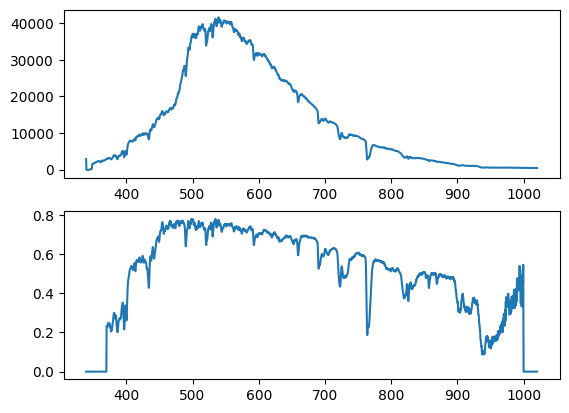

In [17]:
fig, ax = plt.subplots(nrows=2)
ax[0].plot(raw_spec_wl, raw_spec)
ax[1].plot(raw_spec_wl, irrad_spec)
plt.show()

In [18]:
print(f"{raw_spec_wl[500]} nm: {irrad_spec[500]} W/sr*nm")

524.997 nm: 0.7409592270851135 W/sr*nm
